### Import libraries and read the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("marketing_data.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## **Column Details:**
1. **ID:** Customer's Unique Identifier
2. **Year_Birth:** Customer's Birth Year
3. **Education:** Customer's education level
4. **Marital_Status:** Customer's marital status
5. **Income:** Customer's yearly household income
6. **Kidhome:** Number of children in customer's household
7. **Teenhome:** Number of teenagers in customer's household
8. **Dt_Customer:** Date of customer's enrollment with the company
9. **Recency:** Number of days since customer's last purchase
10. **MntWines:** Amount spent on wine in the last 2 years
11. **MntFruits:** Amount spent on fruits in the last 2 years
12. **MntMeatProducts:** Amount spent on meat in the last 2 years
13. **MntFishProducts:** Amount spent on fish in the last 2 years
14. **MntSweetProducts:** Amount spent on sweets in the last 2 years
15. **MntGoldProds:** Amount spent on gold in the last 2 years
16. **NumDealsPurchases:** Number of purchases made with a discount
17. **NumWebPurchases:** Number of purchases made through the company's web site
18. **NumCatalogPurchases:** Number of purchases made using a catalogue
19. **NumStorePurchases:** Number of purchases made directly in stores
20. **NumWebVisitsMonth:** Number of visits to company's web site in the last month
21. **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
22. **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
23. **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
24. **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
25. **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)
26. **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)
27. **Complain:** 1 if customer complained in the last 2 years, 0 otherwise
28. **Country:** Customer's location


## **Data Wrangling**

In [4]:
df.shape

(2240, 28)

We have 2240 rows in the dataset. 

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.info()  #pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
 Income                2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 n

1. We see that column_name "Income" has a space before it's name that will create problems in further analysis, so we'll rename it.

2. There looks a problem with 2 column's datatypes. 
We need to change the datatype of "**Income**" column into **int64** so that it can be used for further calculations, and change the datatype of "**Dt_Customer**" into datetime.

In [7]:
df.rename(columns={' Income ':'Income'},inplace=True)

In [8]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%m/%d/%y')  
df["Income"] = df["Income"].str.replace("$","").str.replace(",","") 
df["Income"] = df["Income"].astype(float)

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [10]:
df.nunique() 

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

We have data of 2240 unique Customers. No customer ID is repeated in the data. 

### reomve IDs

In [11]:
df.drop(['ID'],axis=1,inplace =True)

### Check duplicates if any

In [12]:
duplicate = df[df.duplicated(subset=None,keep='first')] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate.shape 
#duplicate

Duplicate Rows :


(47, 27)

In [13]:
df= df.drop_duplicates() 

In [14]:
df.shape

(2193, 27)

no duplicates present in the data

### Handle missing values

In [15]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

We only have 24 missing values in the "**Income**" column.
So, we first check the skewness of the column.
If the data is symetrical, we use mean to impute the missing values, else we will use median.

To check the skewness, let us plot the boxplot and histogram. 

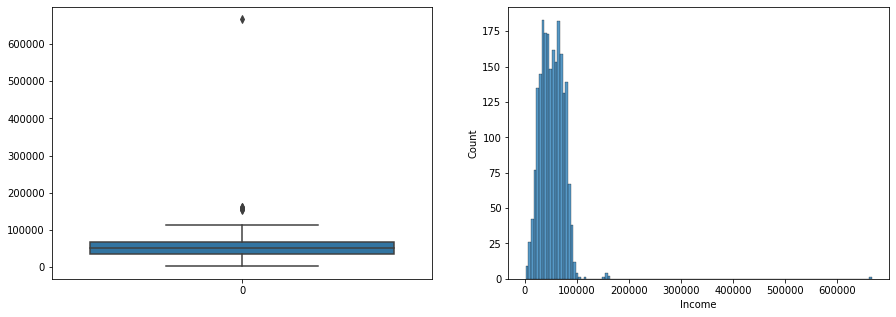

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df["Income"])
plt.subplot(1,2,2)
sns.histplot(df["Income"])

We can see that the distribution is rightly skewed. It has a lot of outliers towards the right and so, mean will not be a good imputation method as mean is sensitive to outliers. 

In [17]:
df["Income"].fillna(value=df["Income"].median(),inplace=True)

### Divide the dataframe into 3 sub dataframes: categorical string, categorical numerical, Numerical

In [18]:
# split the dg --> two sub df 
# 1. categorial -- > Numerical
# 2. categorical -- > string -- > Chi Square test
# 2. Numerical ---> box plot, histogram, scatter

In [19]:
df_cat = df.loc[:,df.dtypes==np.object]

In [20]:
df_cat.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


In [21]:
df_cat.shape

(2193, 3)

In [22]:
cat_num = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']

df_cat_num = df[cat_num]




In [23]:
df_cat_num['Kidhome'].value_counts()

0    1266
1     880
2      47
Name: Kidhome, dtype: int64

In [24]:
df_cat['Marital_Status'].value_counts()

Married     845
Together    570
Single      471
Divorced    226
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [25]:
num = ['Year_Birth','Income','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_num = df[num]

In [26]:
df_num.head()

,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7


## Analysis Numerical Continuous variable

In [27]:
df_num.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,1968.779754,52275.255814,49.125855,304.152303,26.211126,167.314181,37.437301,27.037848,44.181031,2.326037,4.095759,2.660283,5.784770,5.319197
std,11.995943,25103.175746,29.001237,336.584764,39.618627,226.628559,54.628505,41.246123,52.374568,1.928215,2.783545,2.923282,3.250099,2.424269
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35682.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51411.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68274.000000,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


## Univariate Analysis

### Outlier removal

Let us now check if there are any outliers present in the dataset. 

In [28]:
df_num = df_num.drop(['Dt_Customer'],axis=1)

In [29]:
df_num.columns


Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [30]:
df_num.shape

(2193, 14)

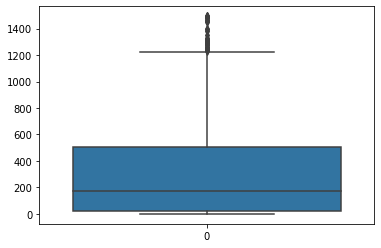

In [31]:
sns.boxplot(data = df_num['MntWines'])

#### No need to remove as amount as can be increased to any level

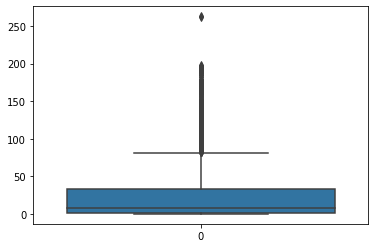

In [32]:
sns.boxplot(data = df_num['MntSweetProducts'])

#### No need to remove as amount as can be increased to any level

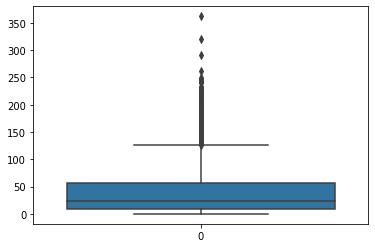

In [33]:
sns.boxplot(data = df_num['MntGoldProds'])

#### No need to remove as amount as can be increased to any level

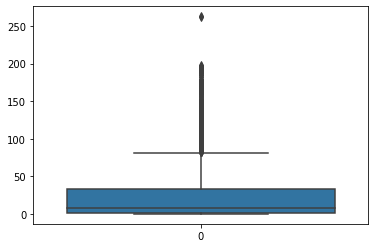

In [34]:
sns.boxplot(data = df_num['MntSweetProducts'])

#### No need to remove as amount as can be increased to any level

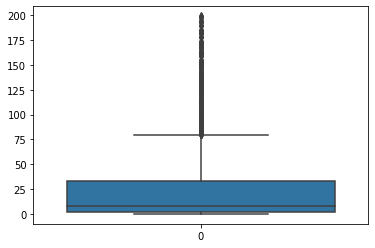

In [35]:
sns.boxplot(data = df_num['MntFruits'])

#### No need to remove as amount as can be increased to any level

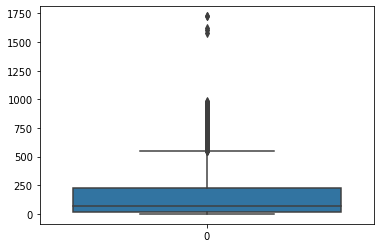

In [36]:
sns.boxplot(data = df_num['MntMeatProducts'])

#### No need to remove as amount as can be increased to any level

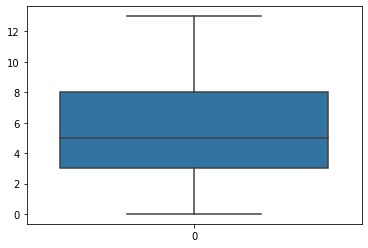

In [37]:
sns.boxplot(data = df_num['NumStorePurchases'])

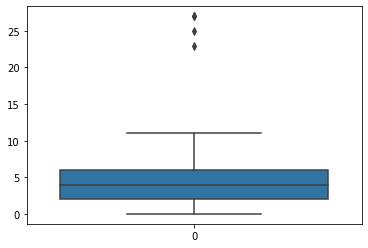

In [38]:
sns.boxplot(data = df_num['NumWebPurchases'])

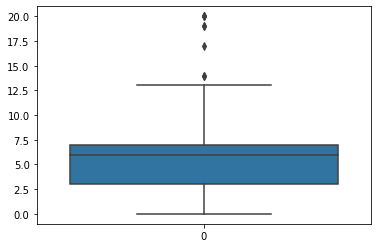

In [39]:
sns.boxplot(data = df_num['NumWebVisitsMonth'])

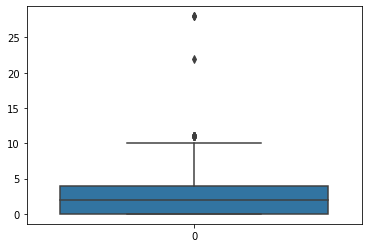

In [40]:
sns.boxplot(data = df_num['NumCatalogPurchases'])

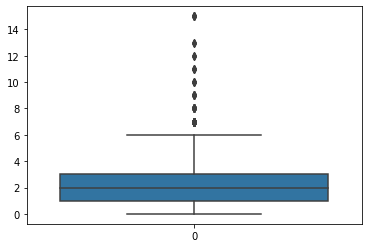

In [41]:
sns.boxplot(data = df_num['NumDealsPurchases'])

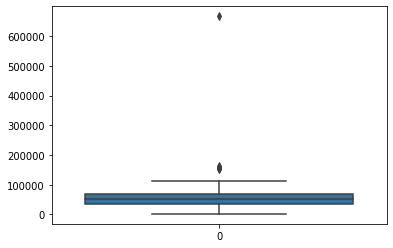

In [42]:
sns.boxplot(data = df_num['Income'])

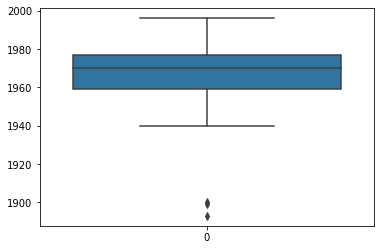

In [43]:
sns.boxplot(data = df_num['Year_Birth'])

#### We need to remove it as it's not possible for a customer to have birth year less than 1900

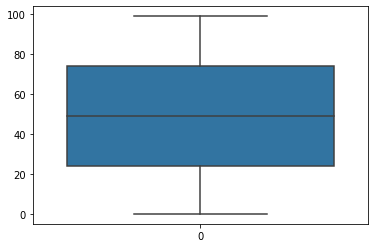

In [44]:
sns.boxplot(data = df_num['Recency'])

In [45]:
Q1 = df_num['Year_Birth'].quantile(0.25)
Q3 = df_num['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
print(Q1 )
print(Q3 )

1959.0
1977.0


In [46]:
df_num.shape

(2193, 14)

In [47]:
df_num = df_num[~((df_num['Year_Birth'] < (Q1 - 1.5 * IQR)) |(df_num['Year_Birth'] > (Q3 + 1.5 * IQR)))]

In [48]:
df_num.shape

(2190, 14)

In [49]:
df_num['Year_Birth'].shape

(2190,)

## Histogram

<Figure size 720x360 with 0 Axes>

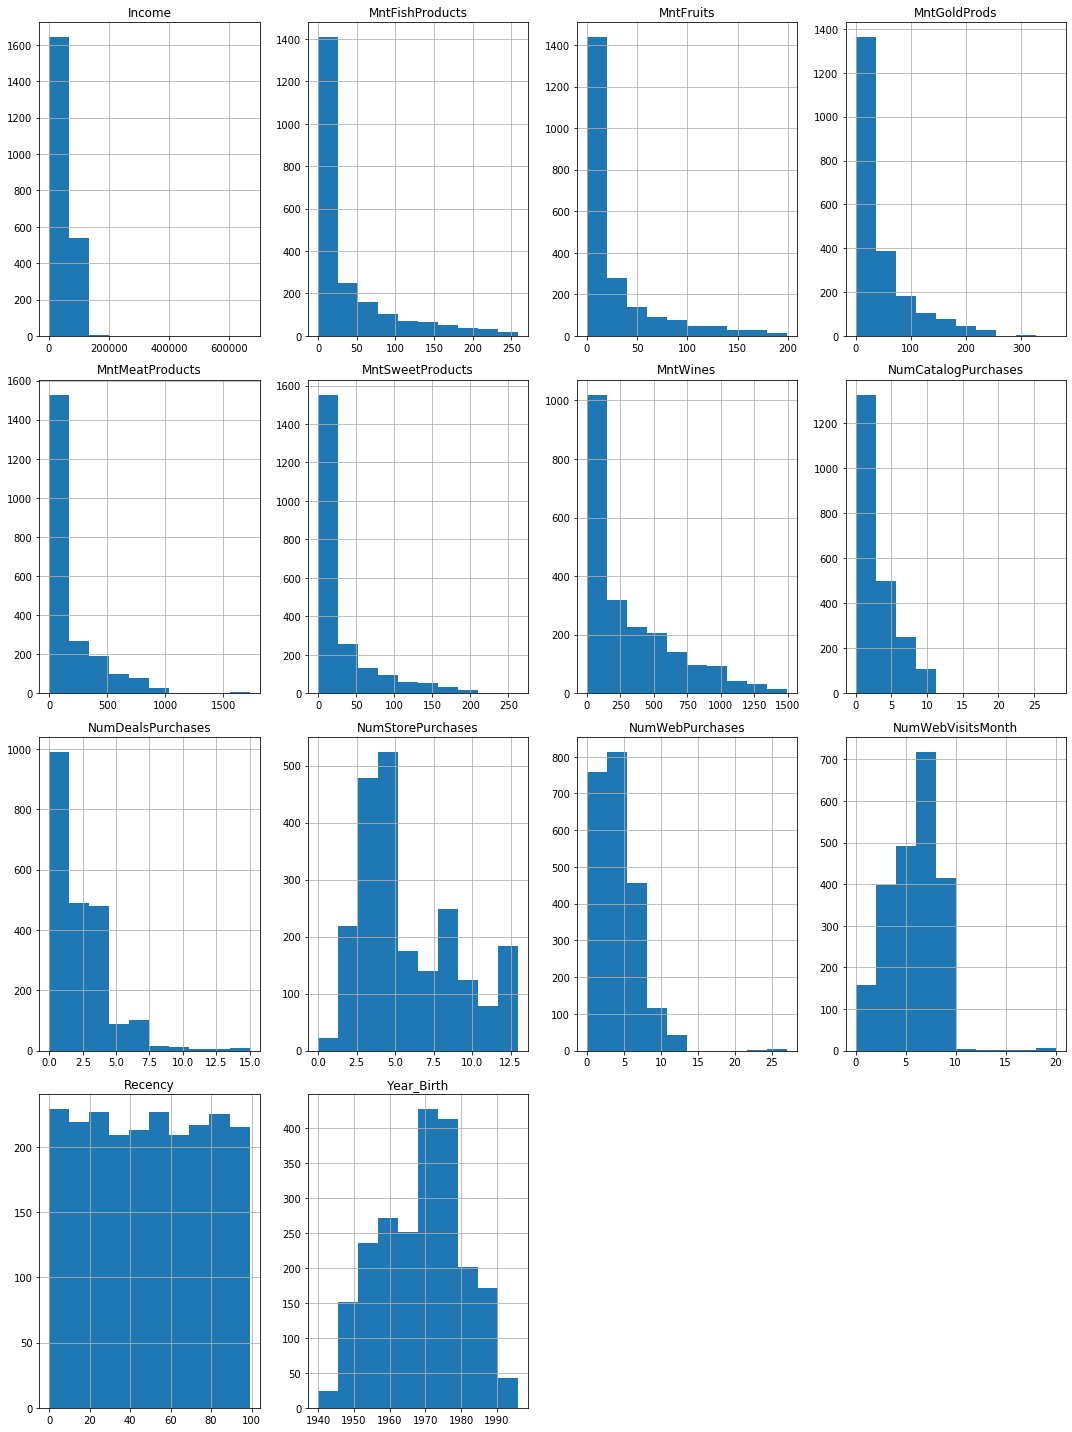

In [50]:
plt.figure(figsize=(10,5))
df_num.hist(figsize = (15,20))
plt.tight_layout()

C:\softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


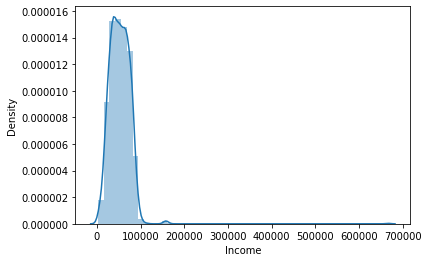

In [51]:
sns.distplot(df["Income"])

**Insight:** We have a varied range of Customers in this store. People with income as high as 700k yearly income and some customers with less than $100k yearly income as well.

However, majority of customers are with low yearly income and there are only a few which have income more than $100k.
This means that the store caters to majorly low-income group customers and doesn't entertain rich/luxury customers. 

So, we will remove this outliers otherwise it will pose a problem in further analysis.
We use the log transformation technqiue for this.


In [52]:
df["Income"] = np.log(df["Income"])

C:\softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


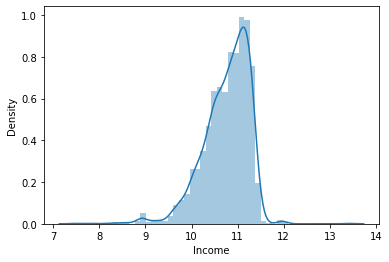

In [53]:
sns.distplot(df["Income"])

## Bivariate analysis

### Correlation

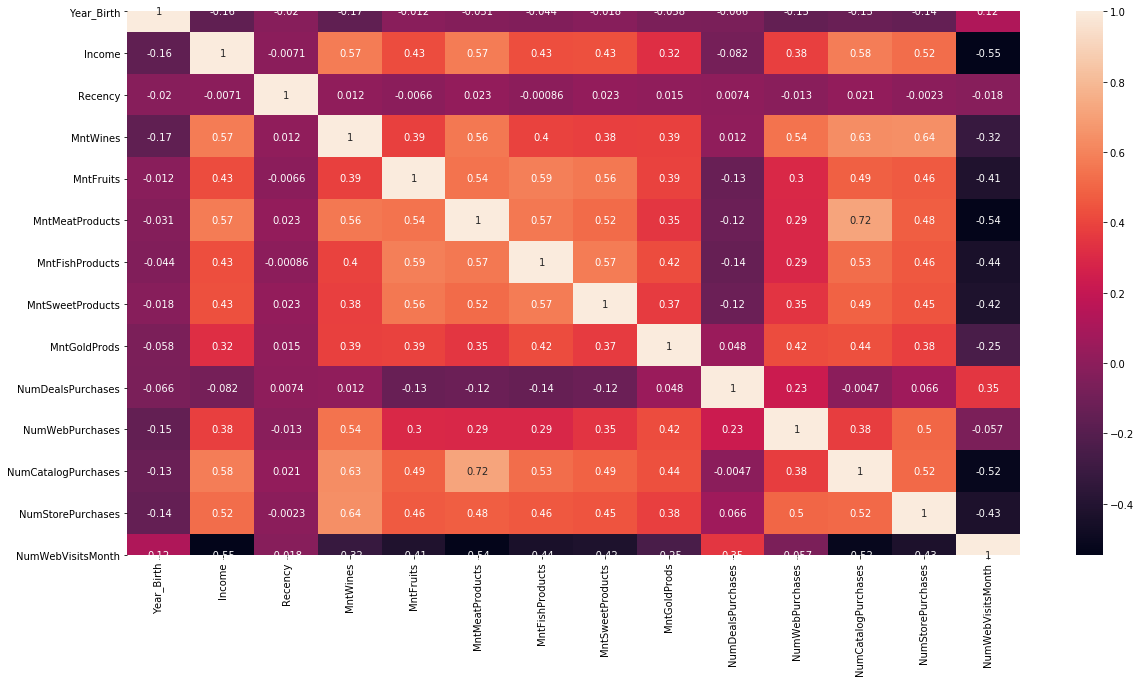

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True)

1. **Income** has a high positive correlation with **"NumPurchases"** columns and **"Mnt"** columns. This represents the High Income cluster and shows people with high income spend more and purchase more frequently. **Income** has a high negative correlation with **"NumWebVisitsMonth"** suggesting that customers with high income do not for web visits too often.

2. **"Amount Spent on Wines"** has a high positive correlation with **"NumCatalogPurchases"** and **"NumStorePurchases"**, and similarly,  **"Amount Spent on Meat products"** has a very high positive correlation with **"NumCatalogPurchases"**, suggesting that People generally buy Wines and Meat products through Catalogs. 

4. **"NumWebVisitsMonth"** shows no correlation with **"NumWebPurchases"**.  Instead, it shows a mild correlation with **"NumDealsPurchases"** which suggests that deals are an effective way of stimulating purchases on the website. 


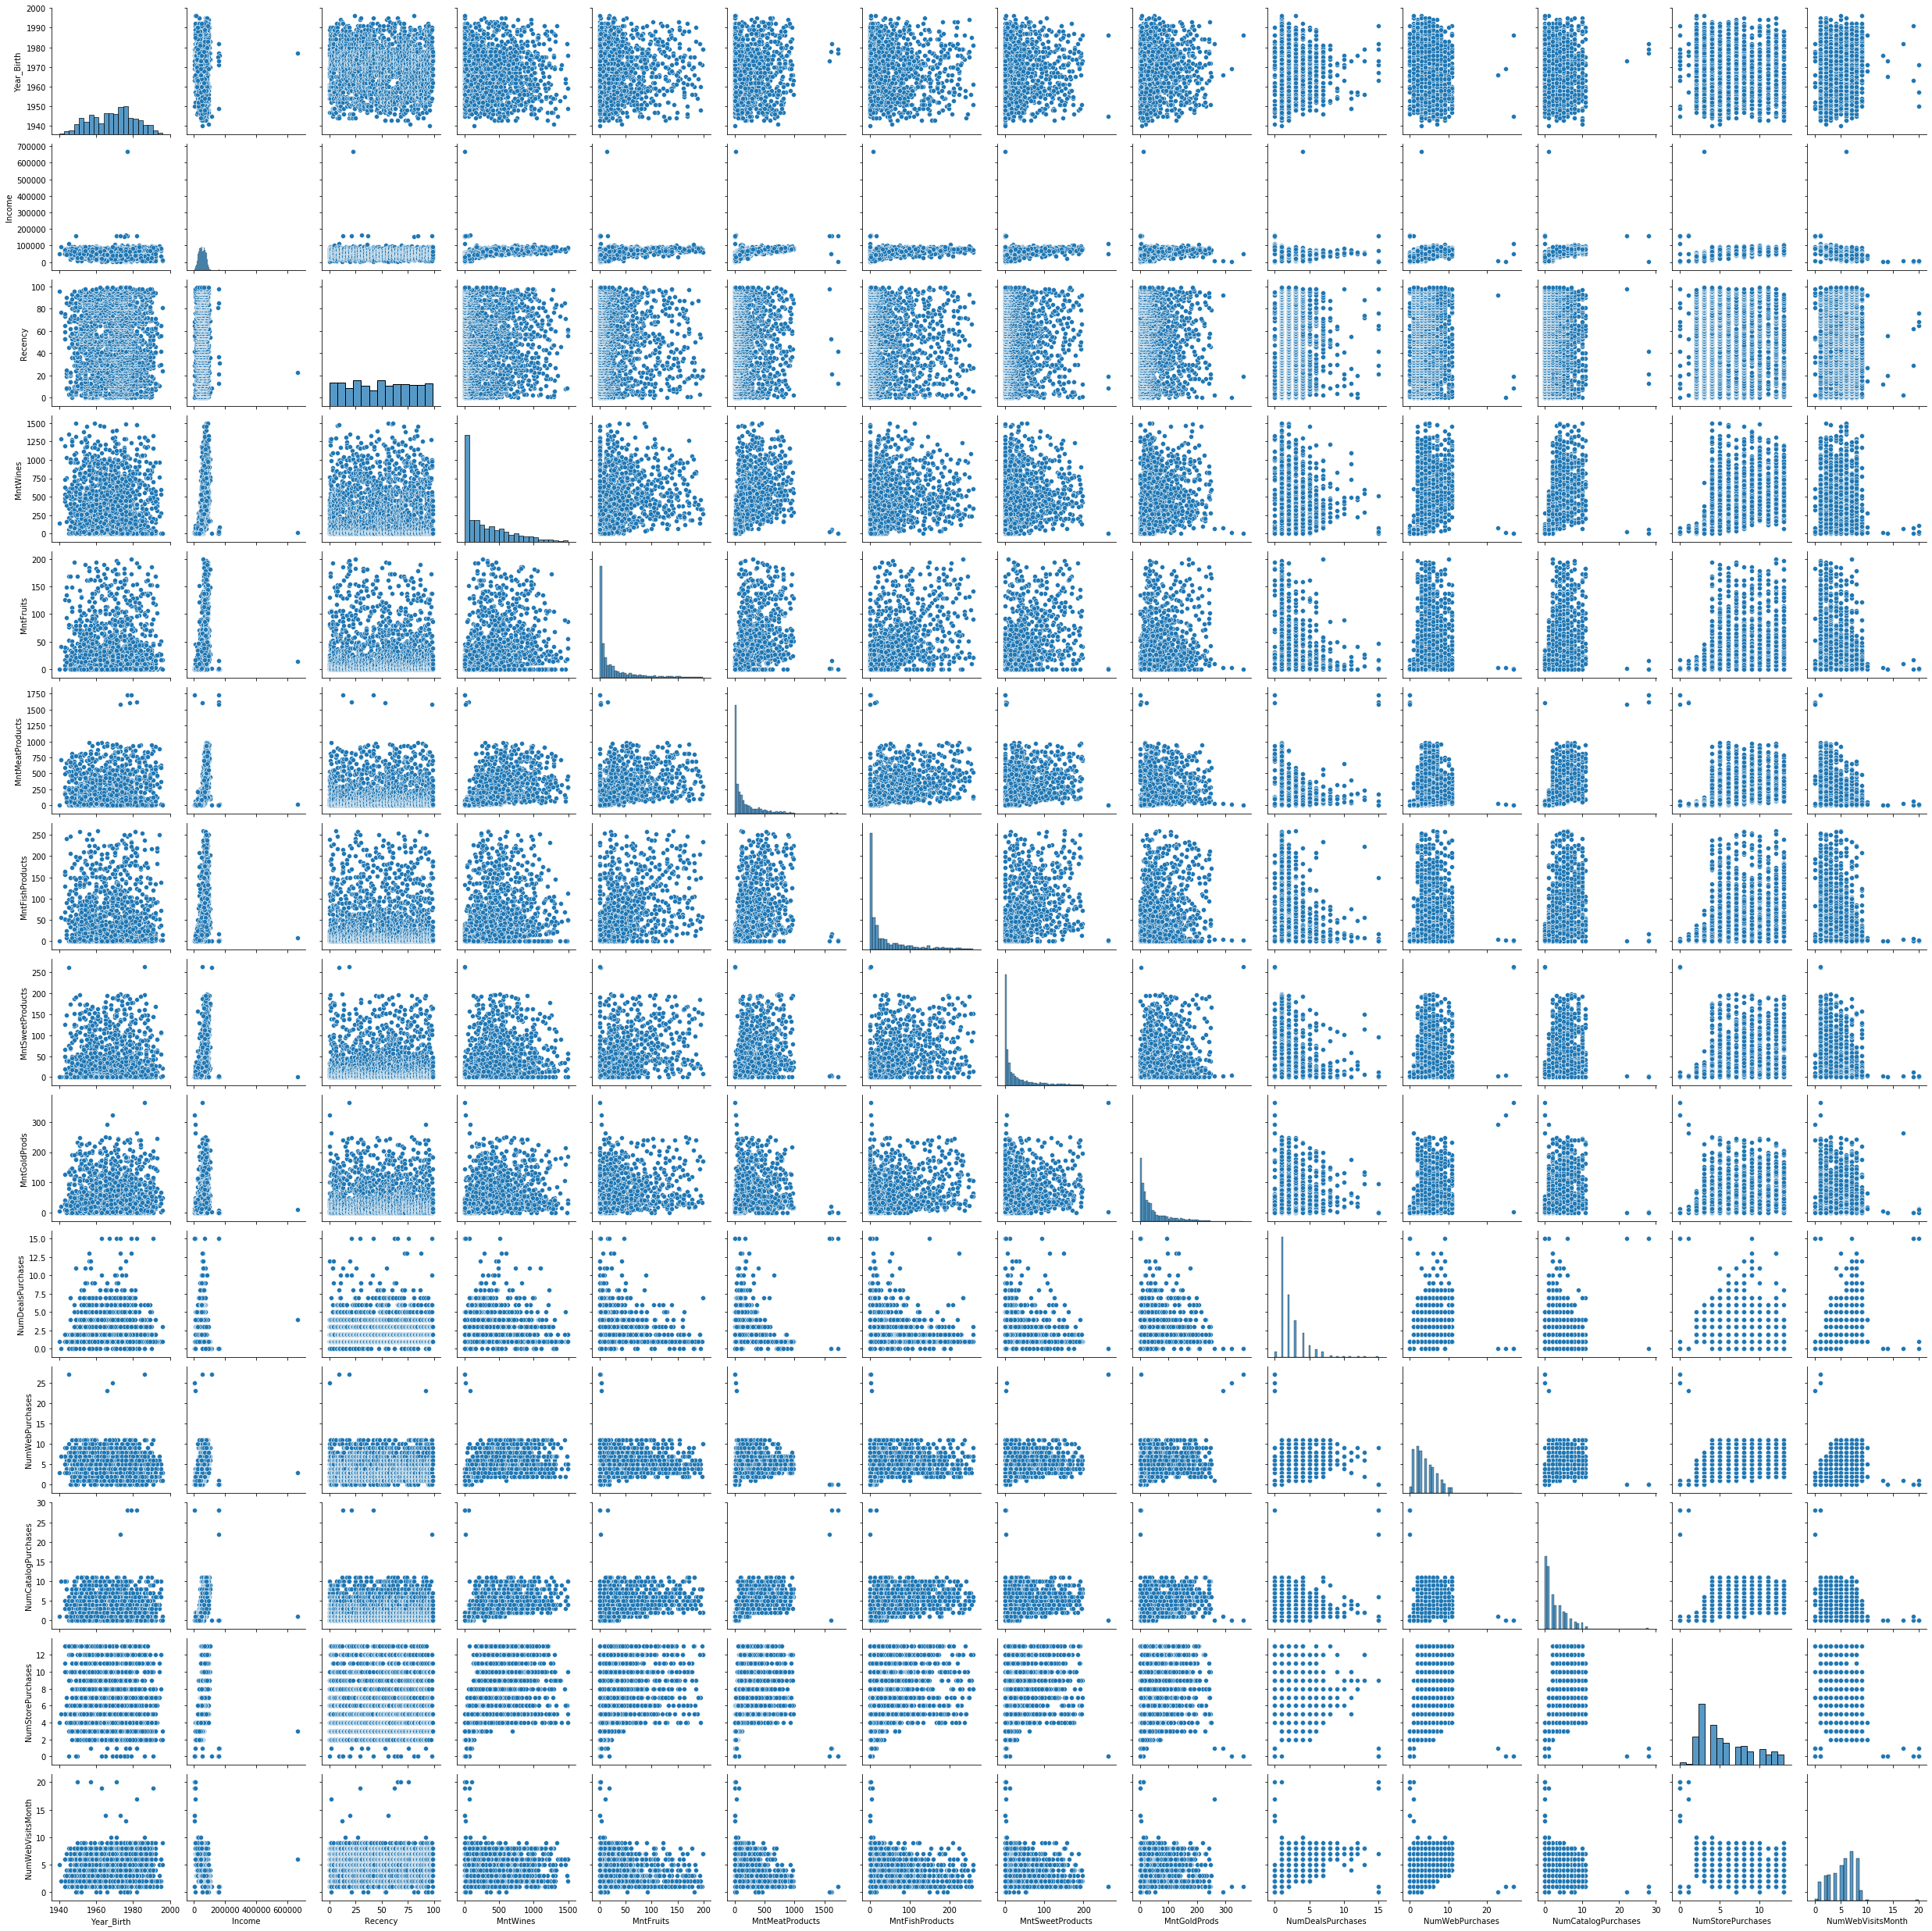

In [55]:
sns.pairplot(df_num)

### Analysis of each  categorical column

###  Education

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


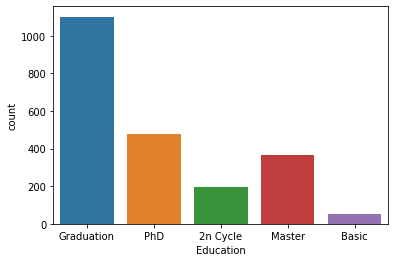

In [56]:
sns.countplot(df["Education"])

Second cycle corresponds to graduate level or master's level studies. Third cycle corresponds to doctoral or PhD level studies. 
This type of education system is usally accepted in European countries.

**Insight:** So we have maximum customers who have completed their Graduation, and only a few of them have gone to study further after Graduation.

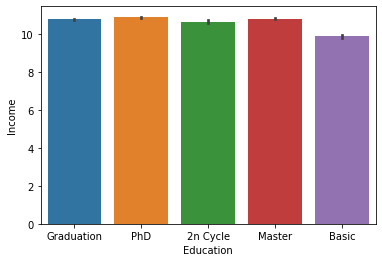

In [57]:
sns.barplot(x=df["Education"],y=df["Income"])

This is barplot wih x-axis as "Education" and y-axis "Income".

**Insight:** Customers with PhD degree have highest average income as compared to other customers.

###  Marital Status

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


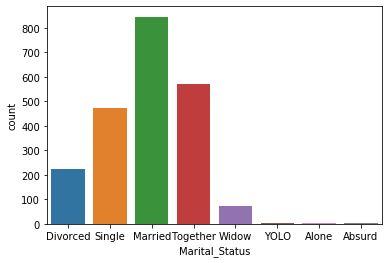

In [58]:
sns.countplot(df["Marital_Status"])

Number of married customers are the most for this store. 

With the help of client, you can have a better understanding of the data and clean this type of data. Like you can merge the YOLO, Alone and Single categories together. 

But domain knowledge is important here. 

### Country

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


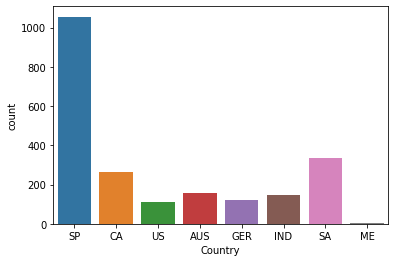

In [59]:
sns.countplot(df["Country"])

1. Spain has maximum customers.
2. Mean birth year for all countries is approximately the same.
3. Average Income of customers of all countries is approximately the same.


### Additional Features

###  Products


In [60]:
Products = [col for col in df.columns if 'Mnt' in col]
Products_total = []
for i in range(0,6):
  print("{} = ${}".format(Products[i],df[Products[i]].sum(axis=0)))
  Products_total.append(df[Products[i]].sum(axis=0))

MntWines = $667006
MntFruits = $57481
MntMeatProducts = $366920
MntFishProducts = $82100
MntSweetProducts = $59294
MntGoldProds = $96889


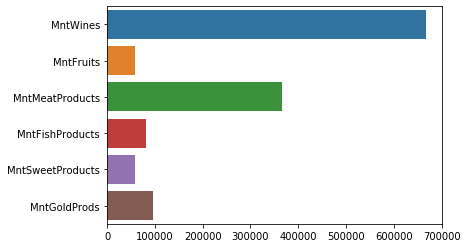

In [61]:
sns.barplot(x=Products_total, y=Products)

This clearly shows Maximum Amount is spent on Wines, so it is most favorite product of all customers. The next favourite product is Meat Products.

### Purchases

In [62]:
Purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
Purchases_total = []
for i in range(0,4):
  print("{} = {}".format(Purchases[i],df[Purchases[i]].sum(axis=0)))
  Purchases_total.append(df[Purchases[i]].sum(axis=0))

NumDealsPurchases = 5101
NumWebPurchases = 8982
NumCatalogPurchases = 5834
NumStorePurchases = 12686


In [63]:
Purchases

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

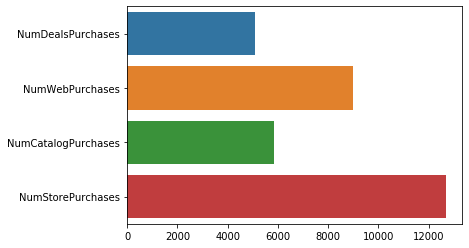

In [64]:
sns.barplot(x=Purchases_total, y=Purchases)

This shows that maximum purchases have been done through store visits and the next is through website. 



## Categorical Numerical

###  Complain

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


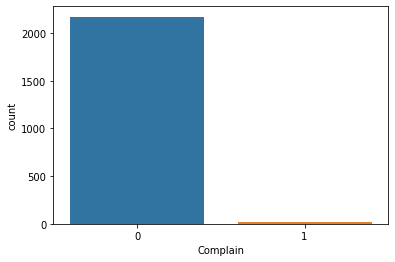

In [65]:
sns.countplot(df["Complain"])

Very few complaints have been made by the customers. Majority of people did not have any complaints. So the company can focus on people who had filed complaints and resolve those to have a no complaint record. 


 

### AcceptedCmp1

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


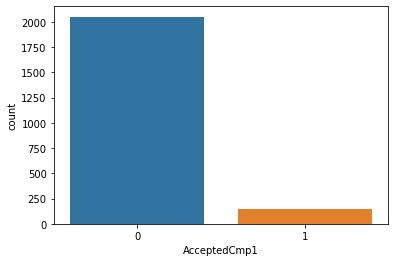

In [66]:
sns.countplot(df["AcceptedCmp1"])

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


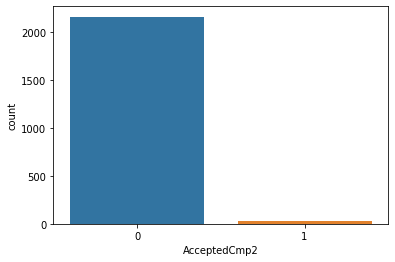

In [67]:
sns.countplot(df["AcceptedCmp2"])

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


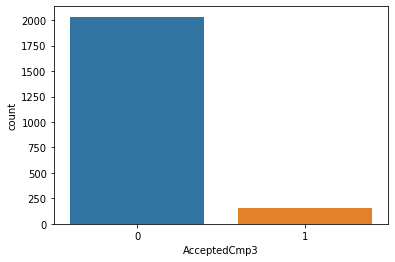

In [68]:
sns.countplot(df["AcceptedCmp3"])

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


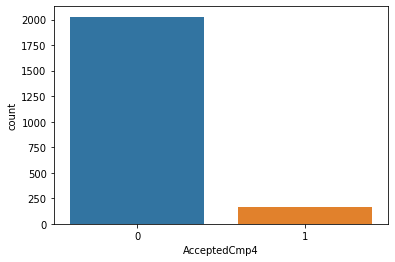

In [69]:
sns.countplot(df["AcceptedCmp4"])

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


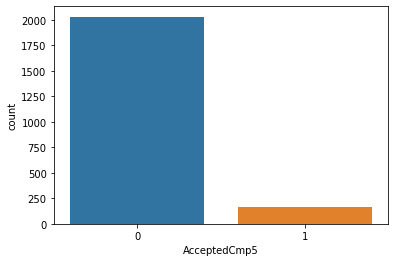

In [70]:
sns.countplot(df["AcceptedCmp5"])

C:\softwares\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


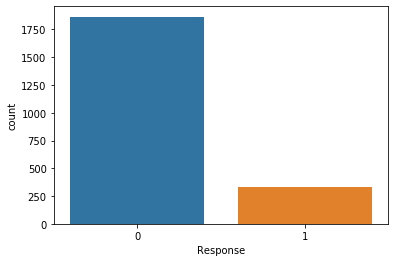

In [71]:
sns.countplot(df["Response"])

### Kidhome + teenhome

In [72]:
df2 = df.copy()
df2["AmountSpent"] = df[Products].sum(axis=1)
df2["PurchasesMade"] = df[Purchases].sum(axis=1)

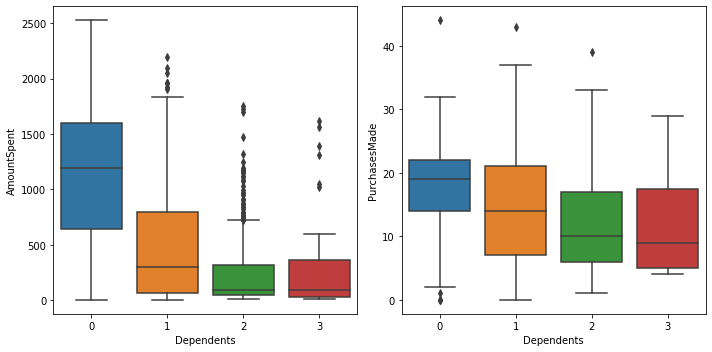

In [73]:

df2["Dependents"] = df2["Kidhome"] + df2["Teenhome"]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Dependents"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Dependents"])
plt.tight_layout()

This shows that customers with more dependents spend less, as compared to customers with less dependents. 
Also, customers with more dependents make less number of purchases in the store.

### Feature Transformation

In [74]:
df2["Age"] = pd.datetime.today().year - df["Year_Birth"]

In [75]:
df2["Age_category"] = df2['Age'].apply(lambda x: 'Senior Citizen' if x >= 60 else 'Adult' if x > 25 else 'Youth')

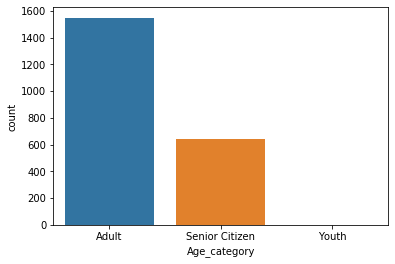

In [76]:
sns.countplot(x=df2["Age_category"])

So we have most of the customers in the age group 25 to 60. 

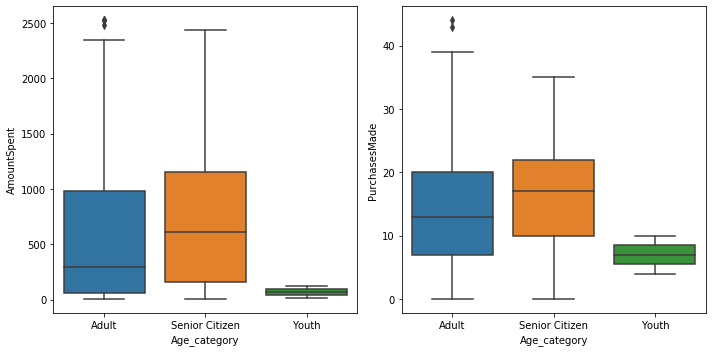

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Age_category"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Age_category"])
plt.tight_layout()

Surprisingly, Senior citizens are making more puchases and spending more as compared to Adults. 

## Statistical Analysis

### What factors are significantly related to the number of store purchases?

In [78]:
df_num.corrwith(df_num.NumStorePurchases).sort_values()

NumWebVisitsMonth     -0.428536
Year_Birth            -0.142604
Recency               -0.002313
NumDealsPurchases      0.065763
MntGoldProds           0.383049
MntSweetProducts       0.449663
MntFishProducts        0.459325
MntFruits              0.462991
MntMeatProducts        0.477979
NumWebPurchases        0.501463
NumCatalogPurchases    0.516116
Income                 0.523633
MntWines               0.639873
NumStorePurchases      1.000000
dtype: float64

As we can see number of store purchases are highly correlated to amount of wines purchased. So we can conclude that may be wines are purchased more of the time from store

Insight: NumStorePurchases decrease with the increase in NumWebVisitsMonth. Also, NumStorePurchases increases with the mAmount spent on wines and NumCatalogPurchases.

### Does Spain fare differs than the Rest of the World in terms of total purchases?

In [79]:
df["AmountSpent"] = df[Products].sum(axis=1)
df["PurchasesMade"] = df[Purchases].sum(axis=1)

In [80]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,AmountSpent,PurchasesMade
0,1970,Graduation,Divorced,11.348463,0,0,2014-06-16,0,189,104,...,0,0,0,0,0,1,0,SP,1190,15
1,1961,Graduation,Single,10.952402,0,0,2014-06-15,0,464,5,...,0,0,0,0,1,1,0,CA,577,18
2,1958,Graduation,Married,11.116425,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,0,US,251,11
3,1967,Graduation,Together,10.388195,1,1,2014-05-11,0,10,0,...,0,0,0,0,0,0,0,AUS,11,4
4,1989,Graduation,Single,9.974598,1,0,2014-04-08,0,6,16,...,1,0,0,0,0,1,0,SP,91,8


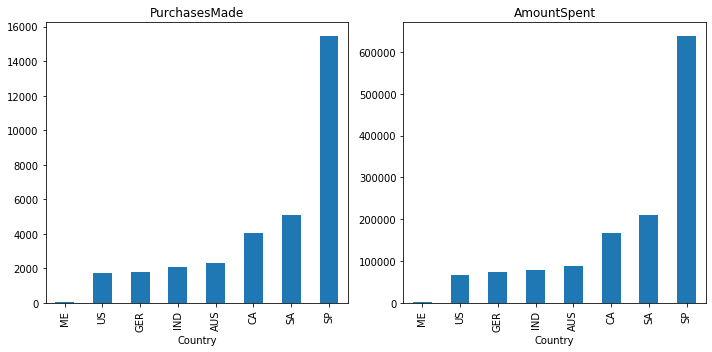

In [81]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.groupby('Country')["PurchasesMade"].sum().sort_values().plot(kind='bar')
plt.title("PurchasesMade")
plt.subplot(1,2,2)
df.groupby('Country')["AmountSpent"].sum().sort_values().plot(kind='bar')
plt.title("AmountSpent")
plt.tight_layout()

Although it is too evident from the visualisation that Spain is the best in terms of Total Amount Spent and Total Purchases made in the store, but for a better analysis we will perform a statistical test. 

## Null Hypothesis test

Null Hypothesis: Spain fare is equal to the average fare of the rest of the world in terms of total purchases. (Spain_avg = Rest_avg)

Alternative Hypothesis: Spain fare differs than the average fare of the rest of the world in terms of total purchases.
(Spain_avg is not equal to Rest_avg)

In [82]:
avg_pur = df.groupby('Country')["PurchasesMade"].mean().sort_values()
avg_pur = pd.DataFrame(avg_pur).reset_index()
avg_pur

,Country,PurchasesMade
0,IND,14.163265
1,AUS,14.408805
2,SP,14.667299
3,GER,14.900000
4,SA,15.140299
5,CA,15.381132
6,US,16.155963
7,ME,19.666667


In [83]:
spain_avg = avg_pur[avg_pur['Country']=='SP']['PurchasesMade'].mean()
rest_avg = avg_pur[avg_pur['Country']!='SP']['PurchasesMade'].mean()
print("Spain's average no of purchases = {}".format(spain_avg) )
print("Rest of the world's average no of purchases = {}".format(rest_avg) )

Spain's average no of purchases = 14.667298578199052
Rest of the world's average no of purchases = 15.688018698560336


In [84]:
from scipy.stats import ttest_ind
pval = ttest_ind(df[df['Country']=='SP']['PurchasesMade'], df[df['Country']!='SP']['PurchasesMade']).pvalue
print("t-test p-value: ", round(pval, 3))

t-test p-value:  0.241


p value > 0.05 --> accept null hypothesis

## Chi Square test

## Is there a significant relationship between geographical region and success of the 4th campaign?

We will use a chi-square test to test this as both are categorical variables.

Null Hypothesis: There is no significant relationship between geographical regional and success of the 4th campaign.
    
Alternative Hypothesis: There is a significant relationship between geographical regional and success of the 4th campaign

In [85]:
crosstab = pd.crosstab(df["Country"],df['AcceptedCmp4'])
crosstab

AcceptedCmp4,0,1
Country,,
AUS,153,6
CA,241,24
GER,109,11
IND,136,11
ME,3,0
SA,315,20
SP,968,87
US,103,6


We can simply pass the crosstab variable through the chi2_contingency() method to conduct a Chi-square test of independence.The first value is the Chi-square value, followed by the p-value , then comes the degrees of freedom , and lastly it outputs the expected frequencies as an array. 

In [86]:
import scipy.stats as stats
chi_sq,p ,dof ,expected = stats.chi2_contingency(crosstab)

In [87]:
print("P-value for chi-sqaure test is = {}".format(p))

P-value for chi-sqaure test is = 0.38733528957845226


Since p-value is much greater than alpha=0.05, we fail to reject the null hypothesis. So we can conclude that there is no evidence of a significant relationship between geographical regional and success of the 4th campaign.

## Conclusion

 #### Store visit or web visit, which brings more customers? : Store Visit
 #### Which campaign performed best and which one worst? : cmp4 performed best and cmp2 least
 #### Which age group purchased the most?: Senior citizen
 #### Which country has maximum customers? Can we focus on that itself?: Spain, but only focusing on spain can't bring customers.
 #### Which product was sold the most in all campagins?: Wine
 #### Is there any contribution of a particular country to make the particular campaign successful?: No
 #### Who purchased the most: people with no dependents
